In [154]:
import jsonlines
import json
from tqdm import tqdm
from text_cleaner import clean_text

In [155]:
# inteiro_teor_registers = []
# with open('data/10000_examples.json') as json_file:
#     data = json.load(json_file)
#     inteiro_teor_registers = data['examples']

In [167]:
inteiro_teor_registers = []
with jsonlines.open('data/parsed_registers/2011.jsonl') as reader:
    for obj in tqdm(reader):
        inteiro_teor_registers.append(clean_text(obj['inteiro_teor']))

171255it [09:28, 301.21it/s]


In [3]:
from syntok.tokenizer import Tokenizer

In [168]:
tok = Tokenizer()

In [169]:
with open('tokens.txt', 'a+', encoding='utf-8') as f:
    for inteiro_teor in tqdm(inteiro_teor_registers):
        inteiro_teor_tokens = []
        for token in tok.tokenize(inteiro_teor.lower()):
            f.write(token.value + ' ')
        f.write('\n')

100%|██████████| 171255/171255 [41:48<00:00, 68.28it/s]


In [170]:
import numpy as np

In [171]:
# sentences = []
# for tokenized_inteiro_teor in all_inteiro_teor_tokens:
#     length = int(len(tokenized_inteiro_teor)/100) + 1
#     chunks = np.array_split(tokenized_inteiro_teor, length)
#     for c in chunks:
#         sentences.append(c.tolist())

In [172]:
import gensim
from gensim.models import Word2Vec
import multiprocessing

In [173]:
# model = Word2Vec(sentences=sentences, size=100, window=5, min_count=5, workers=4, sg=0)

In [174]:
data = gensim.models.word2vec.LineSentence('tokens.txt')

In [176]:
%time model = Word2Vec(data, size=200, window=5, min_count=3, workers=multiprocessing.cpu_count())

CPU times: user 2h 47min 42s, sys: 1min 11s, total: 2h 48min 53s
Wall time: 57min 55s


In [177]:
model.wv.most_similar('parágrafo', topn=30)

[('§', 0.7882053852081299),
 ('paragrafo', 0.7198333144187927),
 ('parág', 0.6492328643798828),
 ('paragráfo', 0.6275804042816162),
 ('dano.parágrafo', 0.5996831655502319),
 ('§§', 0.5931106805801392),
 ('pár', 0.5918283462524414),
 ('prágrafo', 0.5694562196731567),
 ('páragrafo', 0.5515729188919067),
 ('parágrafos', 0.5464076995849609),
 ('arágrafo', 0.5229869484901428),
 ('parágravo', 0.520146906375885),
 ('(§', 0.5185682773590088),
 ('195.122', 0.5153705477714539),
 ('ágrafo', 0.5135937929153442)]

In [188]:
keys = ['parágrafo', 'acordão', 'conhecido']

In [189]:
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.wv.most_similar(word, topn=25):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/home/thiago/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [190]:
from sklearn.manifold import TSNE

In [191]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


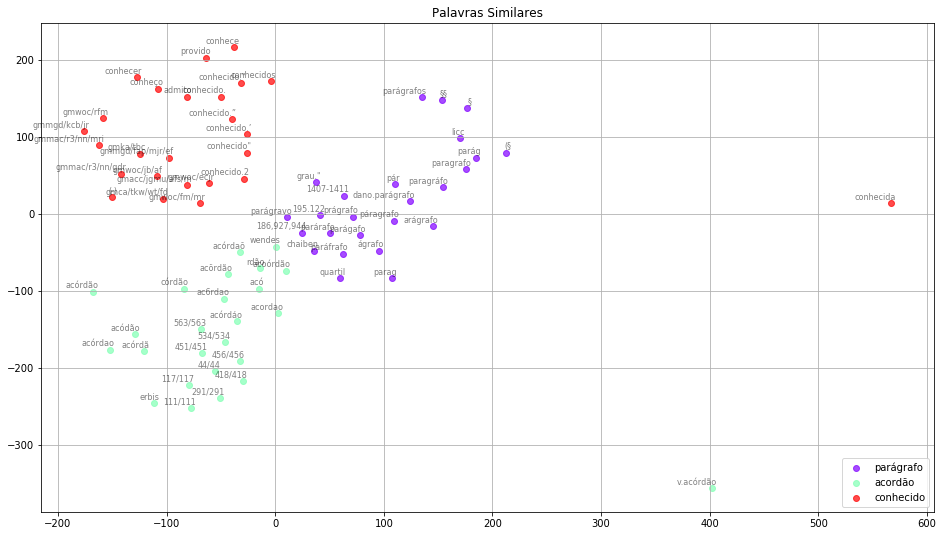

In [192]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Palavras Similares', keys, embeddings_en_2d, word_clusters, 0.7, 'similar_words.png')

In [219]:
from w2v_visualizer import visualize

ModuleNotFoundError: No module named 'tensorflow.contrib'

In [224]:
model.wv.vectors.shape

(365637, 200)

In [226]:
len(model.wv.vocab.keys())

365637